In [1]:
import pandas as pd
df = pd.read_excel('Ask A Manager Salary Survey 2021 (Responses).xlsx')

#df.head()

# rename all columns 
new_column_names = ['time', 'age','industry', 'job', 'job_', 'salary','bonus','currency','currency_','add_income','country','us_state','city','experience_total','experience_field','education','sex','race']
df.columns = new_column_names

# drop some columns
df.drop(columns=['time','job_','currency','currency_','bonus','add_income','us_state','race'])

# rearrange columns
df = df[['sex','age','education','experience_total','experience_field','industry','job','salary']]
df

,sex,age,education,experience_total,experience_field,industry,job,salary
0,Woman,25-34,Master's degree,5-7 years,5-7 years,Education (Higher Education),Research and Instruction Librarian,55000
1,Non-binary,25-34,College degree,8 - 10 years,5-7 years,Computing or Tech,Change & Internal Communications Manager,54600
2,Woman,25-34,College degree,2 - 4 years,2 - 4 years,"Accounting, Banking & Finance",Marketing Specialist,34000
3,Woman,25-34,College degree,8 - 10 years,5-7 years,Nonprofits,Program Manager,62000
4,Woman,25-34,College degree,8 - 10 years,5-7 years,"Accounting, Banking & Finance",Accounting Manager,60000
...,...,...,...,...,...,...,...,...
27990,Man,45-54,Master's degree,21 - 30 years,21 - 30 years,Art & Design,Associate Architect,115000
27991,Man,25-34,College degree,11 - 20 years,11 - 20 years,"Marketing, Advertising & PR",SVP,165000
27992,Man,18-24,Master's degree,1 year or less,1 year or less,Computing or Tech,Java Software Developer,17760
27993,Non-binary,45-54,Master's degree,31 - 40 years,11 - 20 years,Education (Primary/Secondary),teacher,63000


In [2]:
df.isna().sum()

sex                 167
age                   0
education           216
experience_total      0
experience_field      0
industry             72
job                   0
salary                0
dtype: int64

<Axes: >

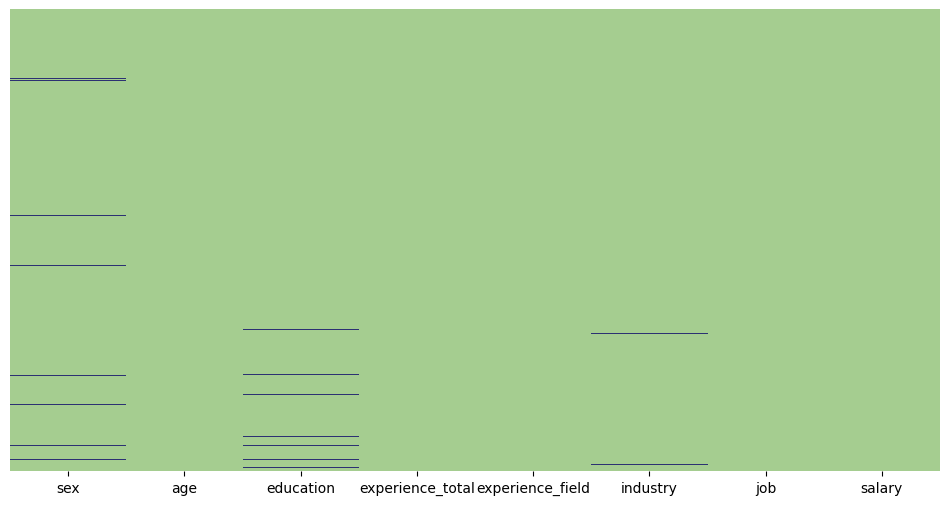

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))

sns.heatmap(df.isnull(),cbar=False, cmap='crest',yticklabels=False)

In [4]:
df[df.isna().any(axis=1)]

,sex,age,education,experience_total,experience_field,industry,job,salary
13,Woman,25-34,NaN,2 - 4 years,2 - 4 years,Law,Legal Aid Staff Attorney,52000
24,Woman,25-34,NaN,5-7 years,2 - 4 years,Public Library,Teen Librarian,44500
171,NaN,25-34,Master's degree,8 - 10 years,5-7 years,Government and Public Administration,Program Analyst,117500
192,Woman,35-44,NaN,11 - 20 years,8 - 10 years,Education (Higher Education),Associate Director,63000
241,Woman,35-44,NaN,11 - 20 years,8 - 10 years,Sales,Sales support,23050
...,...,...,...,...,...,...,...,...
27927,Woman,25-34,NaN,8 - 10 years,8 - 10 years,Government and Public Administration,Environmental Specialist,75000
27932,NaN,45-54,"Professional degree (MD, JD, etc.)",21 - 30 years,5-7 years,Law,Attorney,110000
27942,NaN,45-54,NaN,21 - 30 years,11 - 20 years,Property or Construction,Property Manager,55000
27959,Man,18-24,NaN,1 year or less,1 year or less,Engineering or Manufacturing,Data Engineer,10000


In [5]:
df.dropna(inplace=True)

In [6]:
df.isna().sum()

sex                 0
age                 0
education           0
experience_total    0
experience_field    0
industry            0
job                 0
salary              0
dtype: int64

In [7]:
# Get unique values from each column
unique_values_per_column = {col: df[col].unique() for col in df.columns}

# Display unique values from each column
for col, unique_values in unique_values_per_column.items():
    print(f"{col}: {unique_values}")

sex: ['Woman' 'Non-binary' 'Man' 'Other or prefer not to answer'
 'Prefer not to answer']
age: ['25-34' '45-54' '35-44' '18-24' '65 or over' '55-64' 'under 18']
education: ["Master's degree" 'College degree' 'PhD' 'Some college' 'High School'
 'Professional degree (MD, JD, etc.)']
experience_total: ['5-7 years' '8 - 10 years' '2 - 4 years' '21 - 30 years' '11 - 20 years'
 '1 year or less' '41 years or more' '31 - 40 years']
experience_field: ['5-7 years' '2 - 4 years' '21 - 30 years' '11 - 20 years'
 '1 year or less' '8 - 10 years' '31 - 40 years' '41 years or more']
industry: ['Education (Higher Education)' 'Computing or Tech'
 'Accounting, Banking & Finance' ... 'Undergrad student'
 'Concrete Construction' 'Plumbing']
job: ['Research and Instruction Librarian'
 'Change & Internal Communications Manager' 'Marketing Specialist' ...
 'Ibterb ' 'Java Software Developer' 'Media Buyer ']
salary: [55000 54600 34000 ...   500   456 17760]


In [25]:
#### ΔΕΣ ΤΙ ΚΑΝΕΙΣ ΕΔΩ ΜΕ ΤΟ TITLE
# Apply str.strip() to the entire DataFrame
df = df.applymap(lambda x: x.lower().strip().replace('"','') if isinstance(x, str) else x)

In [26]:
df = df[df['sex'].isin(['woman', 'man'])].reset_index(drop=True)
df

,sex,age,education,experience_total,experience_field,industry,job,salary
0,woman,25-34,master's degree,5-7 years,5-7 years,education (higher education),research and instruction librarian,55000
1,woman,25-34,college degree,2 - 4 years,2 - 4 years,"accounting, banking & finance",marketing specialist,34000
2,woman,25-34,college degree,8 - 10 years,5-7 years,nonprofits,program manager,62000
3,woman,25-34,college degree,8 - 10 years,5-7 years,"accounting, banking & finance",accounting manager,60000
4,man,25-34,master's degree,8 - 10 years,2 - 4 years,education (higher education),scholarly publishing librarian,62000
...,...,...,...,...,...,...,...,...
26546,man,18-24,college degree,2 - 4 years,2 - 4 years,computing or tech,ibterb,456
26547,man,45-54,master's degree,21 - 30 years,21 - 30 years,art & design,associate architect,115000
26548,man,25-34,college degree,11 - 20 years,11 - 20 years,"marketing, advertising & pr",svp,165000
26549,man,18-24,master's degree,1 year or less,1 year or less,computing or tech,java software developer,17760


In [27]:
dt = df['industry'].sort_values().drop_duplicates().tolist()
print(len(dt))
dt

966


['academia',
 'academia - stem',
 'academia / research',
 'academia--cell and molecular biology',
 'academic medicine',
 'academic press production',
 'academic publishing',
 'academic research',
 'academic research (psychology)',
 'academic research (social science)',
 'academic science',
 'academic scientific research',
 'academic/nonprofit research',
 'accessibility',
 'accounting, banking & finance',
 'actuarial',
 'administration',
 'administration (food service)',
 'administration in mlm',
 'administration, it',
 'administrative',
 'administrative support',
 'administrative work',
 'adult education',
 'aerospace',
 'aerospace & defense',
 'aerospace and defense',
 'aerospace and defense manufacturing',
 'aerospace and defense/government contracting',
 'aerospace contracting',
 'aerospace data',
 'aerospace manufacturing',
 'aerospace/aviation',
 'aerospace/defense',
 'affordable housing real estate development (nonprofit)',
 'agriculture or forestry',
 'agriculture/agriculture ch

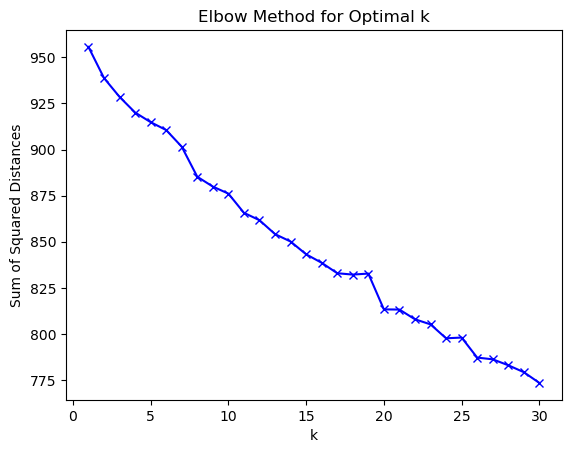

In [17]:
%run optimal_k.py  # Use %run magic command to execute the script

result = find_optimal_clusters(dt,30)

In [28]:
%run nlp.py  # Use %run magic command to execute the script

result = nlp(dt,3)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Group 2:
  - academia
  - academia - stem
  - academia--cell and molecular biology
  - academic medicine
  - academic press production
  - academic publishing
  - accessibility
  - accounting, banking & finance
  - actuarial
  - administration
  - administration (food service)
  - administration in mlm
  - administration, it
  - administrative
  - administrative support
  - administrative work
  - adult education
  - aerospace
  - aerospace & defense
  - aerospace and defense
  - aerospace and defense manufacturing
  - aerospace and defense/government contracting
  - aerospace contracting
  - aerospace data
  - aerospace manufacturing
  - aerospace/aviation
  - aerospace/defense
  - agriculture or forestry
  - agriculture/agriculture chemical
  - airline
  - americorps
  - analytical chemistry
  - analytical lab
  - analytics
  - animal care
  - animal caretaker
  - animal health
  - animal health industry
  - animal health product manufacturing
  - animal welfare
  - animation
  - app